In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

covid19-xray-dataset-train-test-sets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/covid19-xray-dataset-train-test-sets.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [ ]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/xray_dataset_covid19/train',
    class_mode='categorical'
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/xray_dataset_covid19/test',
    class_mode='categorical'
    label_mode ='int',
    labels='inferred',
    batch_size=32,
    image_size=(256,256)
)

Found 148 files belonging to 2 classes.
Found 40 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Conv2D(filters=128, kernel_size=(3, 3),padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding="valid"))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 30, 30, 128)     

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history= model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
5/5 [==============================] - 5s 210ms/step - loss: 1.2576 - accuracy: 0.4459 - val_loss: 0.6823 - val_accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 3s 170ms/step - loss: 0.6824 - accuracy: 0.6149 - val_loss: 0.6034 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 4s 389ms/step - loss: 0.5289 - accuracy: 0.8176 - val_loss: 0.2554 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 3s 225ms/step - loss: 0.2631 - accuracy: 0.9054 - val_loss: 0.1068 - val_accuracy: 0.9500
Epoch 5/10
5/5 [==============================] - 3s 166ms/step - loss: 0.2231 - accuracy: 0.9054 - val_loss: 0.0839 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 4s 227ms/step - loss: 0.1115 - accuracy: 0.9797 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 3s 165ms/step - loss: 0.0902 - accuracy: 0.9662 - val_loss: 0.0338 - val_accuracy: 1.0000
Epoch 8/10
5/5 [====

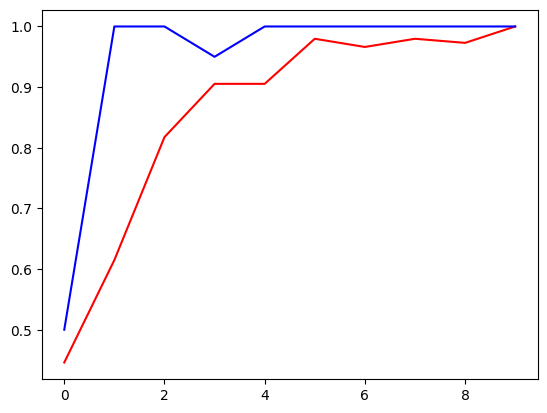

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/p.png')

In [ ]:
test_img.shape

(511, 641, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input= test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 77ms/step


array([[1.]], dtype=float32)